In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Drop unnecessary columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

# Encode categorical columns
label_encoder = LabelEncoder()
df["Geography"] = label_encoder.fit_transform(df["Geography"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# Separate features and target
X = df.drop("Exited", axis=1)
y = df["Exited"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Simple 2-layer neural network
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)

In [16]:
# Predict on test data
y_pred = mlp.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8555
Confusion Matrix:
 [[1529   78]
 [ 211  182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.86      0.84      2000



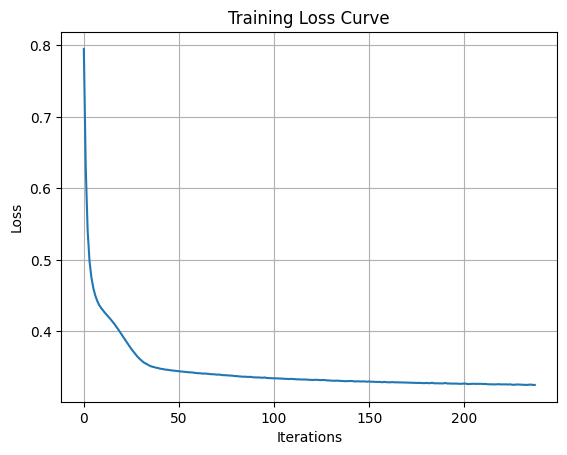

In [18]:
# Step 8: Plot the training loss curve
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
